In [2]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras.utils import pad_sequences
import pandas as pd
import keras
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Question 1: XOR Gate Classification

In [5]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1, 1, 0])

In [6]:
weights = np.ones(2)  # W11, W21 initialized to 1
bias = 1
learning_rate = 0.1
epochs = 10

def threshold_function(z):
    return 1 if z >= 1 else 0

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}:\n")
    for i in range(len(X)):

        z = np.dot(weights, X[i]) + bias

        y_pred = threshold_function(z)

        error = Y[i] - y_pred
        weights += learning_rate * error * X[i]
        bias += learning_rate * error
        print(f"\tInput: {X[i]}\n \tPredicted: {y_pred}\n \tActual: {Y[i]}\n \tWeights: {weights}\n\tBias: {bias}\n")
        print("-----------------------------------------\n")

Epoch 1:

	Input: [0 0]
 	Predicted: 1
 	Actual: 0
 	Weights: [1. 1.]
	Bias: 0.9

-----------------------------------------

	Input: [0 1]
 	Predicted: 1
 	Actual: 1
 	Weights: [1. 1.]
	Bias: 0.9

-----------------------------------------

	Input: [1 0]
 	Predicted: 1
 	Actual: 1
 	Weights: [1. 1.]
	Bias: 0.9

-----------------------------------------

	Input: [1 1]
 	Predicted: 1
 	Actual: 0
 	Weights: [0.9 0.9]
	Bias: 0.8

-----------------------------------------

Epoch 2:

	Input: [0 0]
 	Predicted: 0
 	Actual: 0
 	Weights: [0.9 0.9]
	Bias: 0.8

-----------------------------------------

	Input: [0 1]
 	Predicted: 1
 	Actual: 1
 	Weights: [0.9 0.9]
	Bias: 0.8

-----------------------------------------

	Input: [1 0]
 	Predicted: 1
 	Actual: 1
 	Weights: [0.9 0.9]
	Bias: 0.8

-----------------------------------------

	Input: [1 1]
 	Predicted: 1
 	Actual: 0
 	Weights: [0.8 0.8]
	Bias: 0.7000000000000001

-----------------------------------------

Epoch 3:

	Input: [0 0]
 	Predicted

In [7]:
model = Sequential()

# Hidden layer with 2 neurons and ReLU activation
model.add(Dense(units=2, input_dim=2, activation='relu'))

# Output layer with 1 neuron and sigmoid activation
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, Y, epochs=500, verbose=0)

predictions = model.predict(X)
predictions = np.round(predictions)  # Round the predictions to 0 or 1

for i in range(len(X)):
    print(f"\nInput: {X[i]}\n\n\tPredicted Output: {predictions[i][0]}\n\tActual Output: {Y[i]}\n")
    print("-----------------------------------------\n")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step

Input: [0 0]

	Predicted Output: 1.0
	Actual Output: 0

-----------------------------------------


Input: [0 1]

	Predicted Output: 1.0
	Actual Output: 1

-----------------------------------------


Input: [1 0]

	Predicted Output: 1.0
	Actual Output: 1

-----------------------------------------


Input: [1 1]

	Predicted Output: 1.0
	Actual Output: 0

-----------------------------------------



# Question 2B: Sentiment Analysis Using ANN on IMDb Movie Reviews

In [26]:
df = pd.read_csv('/content/drive/MyDrive/NNDL/CIA-1/IMDB Dataset.csv')

In [27]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [25]:
import re
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    return text

df['review'] = df['review'].apply(clean_text)

# Tokenizing the text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['review'])
X = tokenizer.texts_to_sequences(df['review'])

# Padding sequences
max_len = 100  # Max length of each review
X = pad_sequences(X, maxlen=max_len)

# Encoding the labels
lb = LabelBinarizer()
y = lb.fit_transform(df['sentiment'])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [20]:
model = Sequential()

# Embedding layer (word vectors)
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))

# Hidden layers with ReLU activation
model.add(GlobalMaxPool1D())  # Reduces dimensionality
model.add(Dense(64, activation='relu'))  # Hidden layer 1
model.add(Dropout(0.5))  # Regularization to prevent overfitting

# Output layer with Sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9351 - loss: 0.1838 - val_accuracy: 0.8457 - val_loss: 0.3578
Epoch 2/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9660 - loss: 0.1150 - val_accuracy: 0.8439 - val_loss: 0.4181
Epoch 3/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9850 - loss: 0.0616 - val_accuracy: 0.8382 - val_loss: 0.5103
Epoch 4/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9947 - loss: 0.0271 - val_accuracy: 0.8334 - val_loss: 0.6025
Epoch 5/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9984 - loss: 0.0116 - val_accuracy: 0.8350 - val_loss: 0.6844
Epoch 6/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9996 - loss: 0.0050 - val_accuracy: 0.8344 - val_loss: 0.7632
Epoch 7/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.8349 - val_loss: 0.8163
Epoch 8/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.

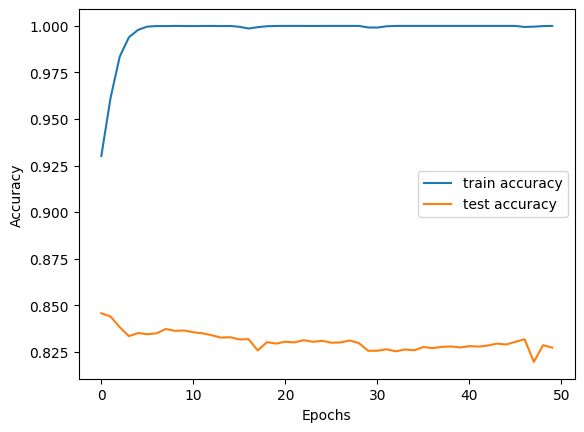

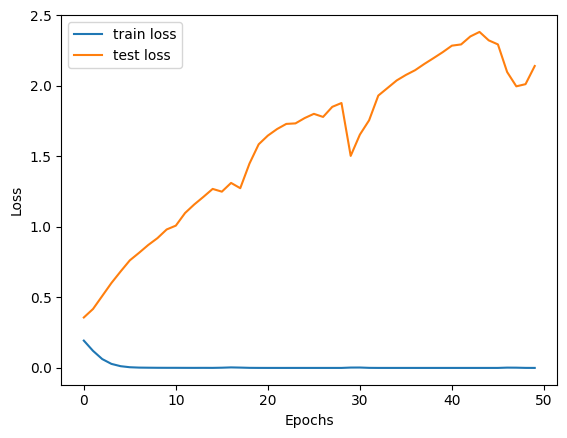

In [23]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8255 - loss: 2.1700
Test Accuracy: 82.72%
